In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier



# Pre-Processing w/o Clustering

Initial clustering of 4 features, elbow plot for k determination, scatter plot of point distribution, clustering img. 

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
train = "/content/gdrive/My Drive/DataMining/train.csv"
data = pd.read_csv(train)
print(data.head())
data.shape

   is_profit   sym  ...  ceil_var  floor_var
0       True  MGNX  ... -0.034554   0.000802
1       True  MGNX  ... -0.029397   0.006148
2       True  AEIS  ... -0.030638   0.000000
3      False  BERY  ... -0.014746   0.003596
4       True  CSGP  ... -0.016754   0.011470

[5 rows x 23 columns]


(258729, 23)

In [4]:
# Import and subset starter features
profitList = data[['is_profit']]
starterSubSet = data.iloc[:, 3:]
starterSubSet['is_profit'] = profitList
Label = preprocessing.LabelEncoder()
profit = Label.fit_transform(starterSubSet['is_profit'])
starterSubSet.shape

(258729, 21)

In [7]:
# Split starterSubSet into training and testing datasets
train, test = train_test_split(starterSubSet, random_state = 42)
X_train = train[train.columns[0:20]]
y_train = train['is_profit']
X_test = test[test.columns[0:20]]
y_test = test['is_profit']
print(X_train.head())


            rsi14  sma9_var  ...  ceil_var  floor_var
227266  32.486354 -0.001689  ... -0.008645   0.000000
49447   36.306975 -0.009363  ... -0.063270   0.096304
184171  34.479248 -0.004733  ... -0.033791   0.000000
256952  39.547875 -0.002248  ... -0.039099   0.001625
18820   27.885467 -0.002161  ... -0.030207   0.016667

[5 rows x 20 columns]


In [8]:
# Scale features
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
print(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

            rsi14  sma9_var  ...  ceil_var  floor_var
227266  32.486354 -0.001689  ... -0.008645   0.000000
49447   36.306975 -0.009363  ... -0.063270   0.096304
184171  34.479248 -0.004733  ... -0.033791   0.000000
256952  39.547875 -0.002248  ... -0.039099   0.001625
18820   27.885467 -0.002161  ... -0.030207   0.016667
...           ...       ...  ...       ...        ...
119879  34.178246 -0.002115  ... -0.013820   0.000000
103694  33.637746 -0.000929  ... -0.008626   0.005384
131932  35.590710 -0.001901  ... -0.007900   0.007114
146867  36.973268 -0.004729  ... -0.026031   0.000000
121958  27.560583 -0.001924  ... -0.028258   0.000000

[194046 rows x 20 columns]


# Artificial Neural Network w/o Clustering

# Pre-Processing w/ Fuzzy Clustering Probabilities

In [ ]:
fuzzytrain = "/content/gdrive/My Drive/DataMining/Clustered_3.csv"
fuzzyData = pd.read_csv(fuzzytrain)
fuzzySubSet = pd.read_csv(train)

In [ ]:
fuzzyData.head()

,Unnamed: 0,0,1,2,3,Cluster 1 Prob,Cluster 2 Prob,Cluster 3 Prob
0,0,0.371055,0.613722,0.460930,0.549934,0.013404,0.026334,0.960262
1,1,0.613812,0.843916,0.507860,0.599319,0.719745,0.194581,0.085674
2,2,0.429319,0.693091,0.476690,0.554652,0.207770,0.425074,0.367156
3,3,0.463555,0.846391,0.535086,0.616602,0.826462,0.151658,0.021880
4,4,0.349795,0.848878,0.527060,0.629240,0.250291,0.682820,0.066889


In [ ]:
# Import and subset starter features
fuzzySubSet = fuzzySubSet[['is_profit','rsi14','sma9_var', 'sma180_var', 'vwap_var']]
probabilityC1, probabilityC2, probabilityC3 = fuzzyData['Cluster 1 Prob'], fuzzyData['Cluster 2 Prob'], fuzzyData['Cluster 3 Prob']
fuzzySubSet['C1prob'] = probabilityC1
fuzzySubSet['C2prob'] = probabilityC2
fuzzySubSet['C3prob'] = probabilityC3
Label_fuzzy = preprocessing.LabelEncoder()
fuzzyProfit = Label_fuzzy.fit_transform(fuzzySubSet['is_profit'])
fuzzyProfit
fuzzySubSet.columns


Index(['is_profit', 'rsi14', 'sma9_var', 'sma180_var', 'vwap_var', 'C1prob',
       'C2prob', 'C3prob'],
      dtype='object')

In [ ]:
# Split starterSubSet into training and testing datasets
fuzzyTrain, fuzzyTest = train_test_split(fuzzySubSet, random_state = 42)
X_train_fuzzy = fuzzyTrain[fuzzyTrain.columns[1:9]]
y_train_fuzzy = fuzzyTrain['is_profit']
X_test_fuzzy = fuzzyTest[fuzzyTest.columns[1:9]]
y_test_fuzzy = fuzzytest['is_profit']

In [ ]:
# Scale features
scaler = preprocessing.StandardScaler()
scaler.fit(X_train_fuzzy)
print(X_train_fuzzy)

X_train_fuzzy = scaler.transform(X_train_fuzzy)
X_test_fuzzy = scaler.transform(X_test_fuzzy)

[[-0.38113044  0.41420455  0.52430009 ... -0.8607306   1.47721838
  -0.59765551]
 [ 0.31757657 -2.86106744  0.08034442 ... -0.96100219 -0.81526855
   2.32734095]
 [-0.01667417 -0.88515067 -0.22422935 ... -0.82551301 -0.12669495
   1.3022162 ]
 ...
 [ 0.18658766  0.32360786  0.92596599 ...  0.72221296 -0.3901672
  -0.53050678]
 [ 0.43942687 -0.88338102 -0.09689011 ... -0.45400027 -0.14064256
   0.80239593]
 [-1.28194488  0.31375204 -0.18169892 ... -1.04574125  1.48217125
  -0.34632686]]


# Without clustering ANN

In [9]:
# Implementation of sklearn neural network
MLP = MLPClassifier(hidden_layer_sizes=(20, 10, 10, 10, 10), max_iter=1000)
MLP.fit(X_train, y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 10, 10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [10]:
# Make predictions
predictions = MLP.predict(X_test)

In [11]:
# Display predictions using the class report and confusion matrix built-in features
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(y_test)
print(predictions)

[[33219  7015]
 [12428 12021]]
              precision    recall  f1-score   support

       False       0.73      0.83      0.77     40234
        True       0.63      0.49      0.55     24449

    accuracy                           0.70     64683
   macro avg       0.68      0.66      0.66     64683
weighted avg       0.69      0.70      0.69     64683

78159     False
156605    False
36316     False
254122    False
118240     True
          ...  
176579    False
189339    False
44057     False
277        True
65314      True
Name: is_profit, Length: 64683, dtype: bool
[False  True False ... False False  True]


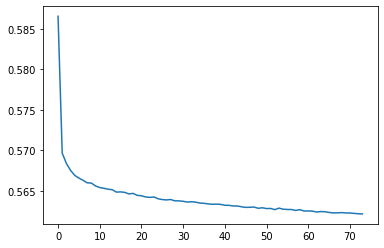

In [12]:
# Accuracy & Loss Estimation
loss_values = MLP.loss_curve_
plt.plot(loss_values)

# Artificial Neural Network w/ Fuzzy Clustering Probabilites

In [ ]:
# Implementation of sklearn neural network
fuzzy_MLP = MLPClassifier(hidden_layer_sizes=(7, 7, 7), max_iter=1000)
fuzzy_MLP.fit(X_train_fuzzy, y_train_fuzzy.values.ravel())

NameError: ignored

In [ ]:
# Make predictions
fuzzyPredictions = fuzzy_MLP.predict(X_test_fuzzy)

In [ ]:
# Display predictions using the class report and confusion matrix built-in features
print(confusion_matrix(y_test_fuzzy, fuzzyPredictions))
print(classification_report(y_test_fuzzy, fuzzyPredictions))

[[33546  6688]
 [13390 11059]]
              precision    recall  f1-score   support

       False       0.71      0.83      0.77     40234
        True       0.62      0.45      0.52     24449

    accuracy                           0.69     64683
   macro avg       0.67      0.64      0.65     64683
weighted avg       0.68      0.69      0.68     64683



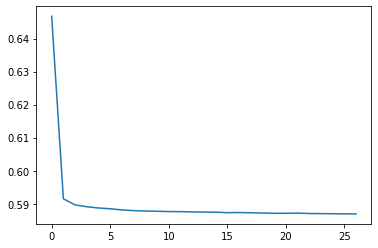

In [ ]:
# Accuracy & Loss Estimation
fuzzy_loss_values = fuzzy_MLP.loss_curve_
plt.plot(fuzzy_loss_values)

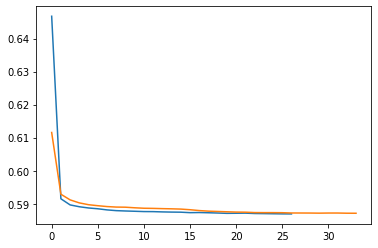

In [ ]:
# plots together
plt.plot(fuzzy_loss_values)
plt.plot(loss_values)

# Metric Review

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [15]:
# Metrics w/o clutsering
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))
print(y_test)
print(predictions)

Accuracy score: 0.6994109735169983
Precision score: 0.631487707501576
Recall score: 0.49167655118818765
F1 score: 0.5528803035529494
78159     False
156605    False
36316     False
254122    False
118240     True
          ...  
176579    False
189339    False
44057     False
277        True
65314      True
Name: is_profit, Length: 64683, dtype: bool
[False  True False ... False False  True]


In [ ]:
# Metrics w/ clustering
print('Accuracy score: {}'.format(accuracy_score(y_test_fuzzy, fuzzyPredictions)))
print('Precision score: {}'.format(precision_score(y_test_fuzzy, fuzzyPredictions)))
print('Recall score: {}'.format(recall_score(y_test_fuzzy, fuzzyPredictions)))
print('F1 score: {}'.format(f1_score(y_test_fuzzy, fuzzyPredictions)))

NameError: ignored

# Within Cluter Classification

> Separate instances using the k-means labels
> Evaluate the clusters, is there a distance measure associted?
> Run ANN within each cluster subset


In [16]:
# Import subsets & separate based on cluster label
subsetFile = "/content/gdrive/My Drive/DataMining/kMeansSubsets.csv"
clusteredSubset = pd.read_csv(subsetFile)
rawData = "/content/gdrive/My Drive/DataMining/train.csv"
originalData = pd.read_csv(rawData)
clusteredSubset.drop('Unnamed: 0',inplace=True, axis = 1)
profitList = originalData['is_profit']
clusteredSubset['is_profit'] = profitList

In [17]:
# For full features
clusterLabels = clusteredSubset['CluterLabels']
originalData['ClusterLabels'] = clusterLabels
originalData.drop('is_profit', inplace=True, axis=1)
originalData['is_profit'] = profitList
print(originalData.head())
allData = originalData.iloc[:, 3:]

    sym             datetime      rsi14  ...  floor_var  ClusterLabels  is_profit
0  MGNX  2020-11-02 11:13:00  30.509761  ...   0.000802              0       True
1  MGNX  2020-11-02 13:55:00  46.452741  ...   0.006148              2       True
2  AEIS  2020-11-02 14:08:00  34.336224  ...   0.000000              1       True
3  BERY  2020-11-02 11:20:00  36.584676  ...   0.003596              2      False
4  CSGP  2020-11-02 13:19:00  29.113480  ...   0.011470              1       True

[5 rows x 24 columns]


In [18]:
# Separate data based on cluster FOR FIRST 4 FEATURES ONLY
# cluster1 = clusteredSubset[clusteredSubset['CluterLabels'] == 0]
# cluster2 = clusteredSubset[clusteredSubset['CluterLabels'] == 1]
# cluster3 = clusteredSubset[clusteredSubset['CluterLabels'] == 2]
# print(cluster1.columns)

# # Drop the cluster label after subsetting FOR FIRST 4 FEATURES ONLY
# cluster1.drop('CluterLabels', inplace=True, axis=1)
# cluster2.drop('CluterLabels', inplace=True, axis=1)
# cluster3.drop('CluterLabels', inplace=True, axis=1)
# print(cluster3.columns)

# Separate data based on cluster FOR ALL FEATURES
cluster1 = originalData[originalData['ClusterLabels'] == 0]
cluster2 = originalData[originalData['ClusterLabels'] == 1]
cluster3 = originalData[originalData['ClusterLabels'] == 2]
print(cluster1.columns)

# Drop the cluster label after subsetting FOR ALL FEATURES
cluster1.drop('ClusterLabels', inplace=True, axis=1)
cluster2.drop('ClusterLabels', inplace=True, axis=1)
cluster3.drop('ClusterLabels', inplace=True, axis=1)
print(cluster3.columns)


Index(['sym', 'datetime', 'rsi14', 'sma9_var', 'sma180_var', 'vwap_var',
       'spread14_e', 'volume14_34_var', 'prev_close_var', 'prev_floor_var',
       'prev_ceil_var', 'prev1_candle_score', 'prev2_candle_score',
       'prev3_candle_score', 'mins_from_start', 'valley_interval_mins',
       'valley_close_score', 'valley_rsi_score', 'day_open_var',
       'open_from_prev_close_var', 'ceil_var', 'floor_var', 'ClusterLabels',
       'is_profit'],
      dtype='object')
Index(['sym', 'datetime', 'rsi14', 'sma9_var', 'sma180_var', 'vwap_var',
       'spread14_e', 'volume14_34_var', 'prev_close_var', 'prev_floor_var',
       'prev_ceil_var', 'prev1_candle_score', 'prev2_candle_score',
       'prev3_candle_score', 'mins_from_start', 'valley_interval_mins',
       'valley_close_score', 'valley_rsi_score', 'day_open_var',
       'open_from_prev_close_var', 'ceil_var', 'floor_var', 'is_profit'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
# Create label encoding for each cluster subset
clusterEncoder = preprocessing.LabelEncoder()
cluster1Profit = clusterEncoder.fit_transform(cluster1['is_profit'])
cluster2Profit = clusterEncoder.fit_transform(cluster2['is_profit'])
cluster3Profit = clusterEncoder.fit_transform(cluster3['is_profit'])


In [ ]:
# # FOR FIRST 4 FEATURES ONLY
# # Split cluster subsets into training and testing datasets
# # Cluster 1
# cluster1Train, cluster1Test = train_test_split(cluster1, random_state = 42)
# X_cluster1Train = cluster1Train[cluster1Train.columns[0:4]]
# y_cluster1Train = cluster1Train['is_profit']
# X_cluster1Test = cluster1Test[cluster1Test.columns[0:4]]
# y_cluster1Test= cluster1Test['is_profit']

# # Cluster 2
# cluster2Train, cluster2Test = train_test_split(cluster2, random_state = 42)
# X_cluster2Train = cluster2Train[cluster2Train.columns[0:4]]
# y_cluster2Train = cluster2Train['is_profit']
# X_cluster2Test = cluster2Test[cluster2Test.columns[0:4]]
# y_cluster2Test= cluster2Test['is_profit']

# # Cluster 3
# cluster3Train, cluster3Test = train_test_split(cluster3, random_state = 42)
# X_cluster3Train = cluster3Train[cluster3Train.columns[0:4]]
# y_cluster3Train = cluster3Train['is_profit']
# X_cluster3Test = cluster3Test[cluster3Test.columns[0:4]]
# y_cluster3Test= cluster3Test['is_profit']

In [20]:
# FOR ALL FEATURES
# Split cluster subsets into training and testing datasets
# Cluster 1
cluster1Train, cluster1Test = train_test_split(cluster1, random_state = 42)
X_cluster1Train = cluster1Train[cluster1Train.columns[2:22]]
y_cluster1Train = cluster1Train['is_profit']
X_cluster1Test = cluster1Test[cluster1Test.columns[2:22]]
y_cluster1Test= cluster1Test['is_profit']

# Cluster 2
cluster2Train, cluster2Test = train_test_split(cluster2, random_state = 42)
X_cluster2Train = cluster2Train[cluster2Train.columns[2:22]]
y_cluster2Train = cluster2Train['is_profit']
X_cluster2Test = cluster2Test[cluster2Test.columns[2:22]]
y_cluster2Test= cluster2Test['is_profit']

# Cluster 3
cluster3Train, cluster3Test = train_test_split(cluster3, random_state = 42)
X_cluster3Train = cluster3Train[cluster3Train.columns[2:22]]
y_cluster3Train = cluster3Train['is_profit']
X_cluster3Test = cluster3Test[cluster3Test.columns[2:22]]
y_cluster3Test= cluster3Test['is_profit']
cluster3Train.columns[2:22]

Index(['rsi14', 'sma9_var', 'sma180_var', 'vwap_var', 'spread14_e',
       'volume14_34_var', 'prev_close_var', 'prev_floor_var', 'prev_ceil_var',
       'prev1_candle_score', 'prev2_candle_score', 'prev3_candle_score',
       'mins_from_start', 'valley_interval_mins', 'valley_close_score',
       'valley_rsi_score', 'day_open_var', 'open_from_prev_close_var',
       'ceil_var', 'floor_var'],
      dtype='object')

In [21]:
# Scale features
scaler = preprocessing.StandardScaler()
scaler.fit(X_cluster1Train)
scaler.fit(X_cluster2Train)
scaler.fit(X_cluster3Train)

# Cluster 1
X_cluster1Train = scaler.transform(X_cluster1Train)
X_cluster1Test = scaler.transform(X_cluster1Test)

# Cluster 2
X_cluster2Train = scaler.transform(X_cluster2Train)
X_cluster2Test = scaler.transform(X_cluster2Test)

# Cluster 3
X_cluster3Train = scaler.transform(X_cluster3Train)
X_cluster3Test = scaler.transform(X_cluster3Test)


# ANN within Cluster Classification

In [24]:
# Implementation of sklearn neural network
MLPC1 = MLPClassifier(hidden_layer_sizes=(20, 10, 10, 10, 10), max_iter=1000)
MLPC2 = MLPClassifier(hidden_layer_sizes=(20, 10, 10, 10, 10), max_iter=1000)
MLPC3 = MLPClassifier(hidden_layer_sizes=(20, 10, 10, 10, 10), max_iter=1000)

# Cluster 1
MLPC1.fit(X_cluster1Train, y_cluster1Train.values.ravel())

# Cluster 2
MLPC2.fit(X_cluster2Train, y_cluster2Train.values.ravel())

# Cluster 3
MLPC3.fit(X_cluster3Train, y_cluster3Train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 10, 10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [25]:
# Make predictions
# Cluster 1
predictionsC1 = MLPC1.predict(X_cluster1Test)

#Cluster 2
predictionsC2 = MLPC2.predict(X_cluster2Test)

# Cluster 3
predictionsC3 = MLPC3.predict(X_cluster3Test)

In [26]:
# Display predictions using the class report and confusion matrix built-in features
# Cluster 1
print('Cluster 1')
print(confusion_matrix(y_cluster1Test, predictionsC1))
print(classification_report(y_cluster1Test, predictionsC1))

# Cluster 2
print('Cluster 2')
print(confusion_matrix(y_cluster2Test, predictionsC2))
print(classification_report(y_cluster2Test, predictionsC2))

# Cluster 3
print('Cluster 3')
print(confusion_matrix(y_cluster3Test, predictionsC3))
print(classification_report(y_cluster3Test, predictionsC3))

Cluster 1
[[ 237 1951]
 [ 275 4331]]
              precision    recall  f1-score   support

       False       0.46      0.11      0.18      2188
        True       0.69      0.94      0.80      4606

    accuracy                           0.67      6794
   macro avg       0.58      0.52      0.49      6794
weighted avg       0.62      0.67      0.60      6794

Cluster 2
[[12464  3585]
 [ 4985  4998]]
              precision    recall  f1-score   support

       False       0.71      0.78      0.74     16049
        True       0.58      0.50      0.54      9983

    accuracy                           0.67     26032
   macro avg       0.65      0.64      0.64     26032
weighted avg       0.66      0.67      0.67     26032

Cluster 3
[[19819  2173]
 [ 6751  3115]]
              precision    recall  f1-score   support

       False       0.75      0.90      0.82     21992
        True       0.59      0.32      0.41      9866

    accuracy                           0.72     31858
   macro 

In [27]:
# Metric Review
print('Accuracy score: {}'.format(accuracy_score(y_cluster1Test, predictionsC1)))
print('Precision score: {}'.format(precision_score(y_cluster1Test, predictionsC1)))
print('Recall score: {}'.format(recall_score(y_cluster1Test, predictionsC1)))
print('F1 score: {}'.format(f1_score(y_cluster1Test, predictionsC1)))

print('Accuracy score: {}'.format(accuracy_score(y_cluster2Test, predictionsC2)))
print('Precision score: {}'.format(precision_score(y_cluster2Test, predictionsC2)))
print('Recall score: {}'.format(recall_score(y_cluster2Test, predictionsC2)))
print('F1 score: {}'.format(f1_score(y_cluster2Test, predictionsC2)))

print('Accuracy score: {}'.format(accuracy_score(y_cluster3Test, predictionsC3)))
print('Precision score: {}'.format(precision_score(y_cluster3Test, predictionsC3)))
print('Recall score: {}'.format(recall_score(y_cluster3Test, predictionsC3)))
print('F1 score: {}'.format(f1_score(y_cluster3Test, predictionsC3)))

Accuracy score: 0.6723579629084486
Precision score: 0.68943011779688
Recall score: 0.9402952670429874
F1 score: 0.7955547391623805
Accuracy score: 0.6707897971727105
Precision score: 0.5823138762670395
Recall score: 0.5006511068816989
F1 score: 0.5384035333405148
Accuracy score: 0.7198819762696967
Precision score: 0.5890695915279879
Recall score: 0.315730792621123
F1 score: 0.41111257753728386


In [ ]:
# Model3 on test of all data
allData.drop('ClusterLabels', inplace=True, axis=1)

fulltrain, fulltest = train_test_split(starterSubSet, random_state = 42)
X_trainfull = fulltrain[fulltrain.columns[0:20]]
y_trainfull = fulltrain['is_profit']
X_testfull = fulltest[fulltest.columns[0:20]]
y_testfull = fulltest['is_profit']
print(X_trainfull.head())
fulltest.columns[0:20]


            rsi14  sma9_var  ...  ceil_var  floor_var
227266  32.486354 -0.001689  ... -0.008645   0.000000
49447   36.306975 -0.009363  ... -0.063270   0.096304
184171  34.479248 -0.004733  ... -0.033791   0.000000
256952  39.547875 -0.002248  ... -0.039099   0.001625
18820   27.885467 -0.002161  ... -0.030207   0.016667

[5 rows x 20 columns]


Index(['rsi14', 'sma9_var', 'sma180_var', 'vwap_var', 'spread14_e',
       'volume14_34_var', 'prev_close_var', 'prev_floor_var', 'prev_ceil_var',
       'prev1_candle_score', 'prev2_candle_score', 'prev3_candle_score',
       'mins_from_start', 'valley_interval_mins', 'valley_close_score',
       'valley_rsi_score', 'day_open_var', 'open_from_prev_close_var',
       'ceil_var', 'floor_var'],
      dtype='object')

In [ ]:
# Scale features
scaler = preprocessing.StandardScaler()
scaler.fit(X_trainfull)

# Cluster 1
X_cluster1Train = scaler.transform(X_trainfull)
X_cluster1Test = scaler.transform(X_testfull)


In [ ]:
# Prediction
fullPrediction = MLPC3.predict(X_testfull)

In [ ]:
print('Full data prediction on mlpC3 classifier')
print(confusion_matrix(y_testfull, fullPrediction))
print(classification_report(y_testfull, fullPrediction))

Full data prediction on mlpC3 classifier
[[40234     0]
 [24449     0]]
              precision    recall  f1-score   support

       False       0.62      1.00      0.77     40234
        True       0.00      0.00      0.00     24449

    accuracy                           0.62     64683
   macro avg       0.31      0.50      0.38     64683
weighted avg       0.39      0.62      0.48     64683



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ROC for best performing model

In [29]:
from sklearn.metrics import roc_curve, auc

In [31]:
fpr2, tpr2, threshold = roc_curve(y_test, MLP.predict_proba(X_test)[:,1])
roc_auc2 = auc(fpr2, tpr2)

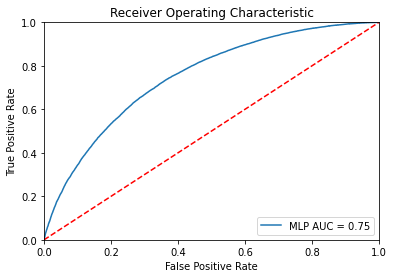

In [36]:
# image drawing
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr2, tpr2, label = 'MLP AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()